In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import matplotlib.colors as mcolor

import pydicom as dicom


import cv2   
from libtiff import TIFF

from scipy.signal import wiener
from scipy import ndimage, misc 

from io import StringIO

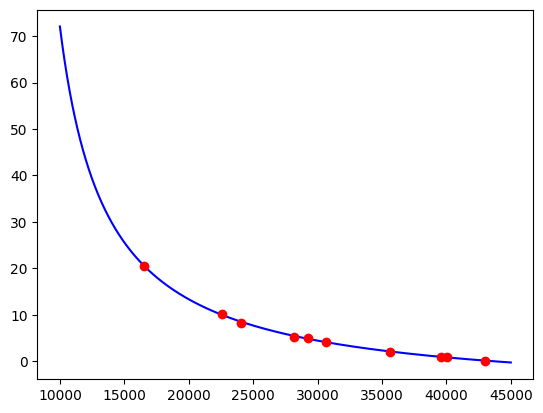

In [2]:
dose_meas = [0, 1.03, 5.11, 4.22, 10.22, 0.92, 5.13, 2.09, 8.28, 20.48]
dose_meas.sort()
pv = [42980, 39602, 28182, 30670, 22603, 40047, 29249, 35631, 24026, 16557]
pv.sort(reverse=True)

def func_dose(x, a, b, c):
    return a/(x+b) +c

p_fit, p_cov = curve_fit(func_dose, pv, dose_meas, maxfev = 100000)

x_fit = np.linspace(10000, 45000, 100000)

plt.plot(x_fit, func_dose(x_fit, *p_fit), 'b-', label='fit')
plt.plot(pv, dose_meas, 'ro', label='data')


In [3]:
pvdr = np.zeros([7])
zeros = np.zeros([7])

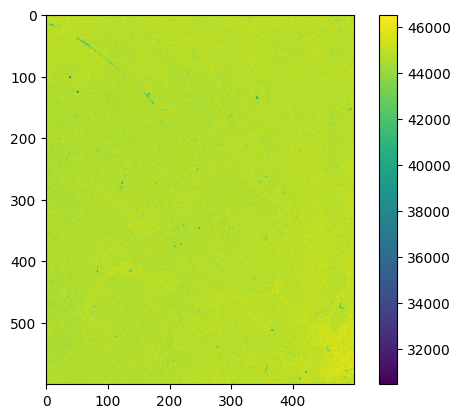

In [4]:
unexp_1 = TIFF.open('scan4/xd_unexp_001.tif')
unexp_2 = TIFF.open('scan4/xd_unexp_002.tif')
unexp_3 = TIFF.open('scan4/xd_unexp_003.tif')
# unexp_4 = TIFF.open('scan4/xd_unexp_004.tif')
# unexp_5 = TIFF.open('scan4/xd_unexp_005.tif')

image_1 = unexp_1.read_image()
image_2 = unexp_2.read_image()
image_3 = unexp_3.read_image()
# image_4 = unexp_4.read_image()
# image_5 = unexp_5.read_image()

image = np.average([image_1, image_2, image_3], axis=0)

fondo = np.average(image[1500:2100, 1000:1500, 0])

plt.imshow(image[1500:2100,1000:1500,0])
plt.colorbar()
plt.show()
                    

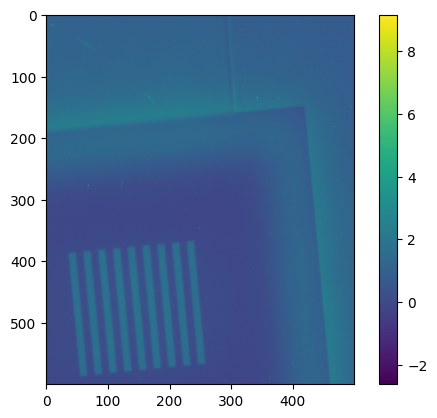

In [7]:
tif_1 = TIFF.open('scan4/xd_1_001.tif')
tif_2 = TIFF.open('scan4/xd_1_002.tif')
tif_3 = TIFF.open('scan4/xd_1_003.tif')
tif_4 = TIFF.open('scan4/xd_1_004.tif')
tif_5 = TIFF.open('scan4/xd_1_005.tif')



image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

#od_1 = np.log10(fondo/image[:,:,0])

od_1 = func_dose(image[:,:,0], *p_fit)

plt.imshow(od_1[1500:2100,1000:1500])
plt.colorbar()

zeros[0] = od_1[1900,1150]

In [6]:
tif_1 = TIFF.open('scan4/xd_2_001.tif')
tif_2 = TIFF.open('scan4/xd_2_002.tif')
tif_3 = TIFF.open('scan4/xd_2_003.tif')
tif_4 = TIFF.open('scan4/xd_2_004.tif')
tif_5 = TIFF.open('scan4/xd_2_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_2 = np.log10(fondo/image[:,:,0])

od_2 = func_dose(image[:,:,0], *p_fit)

zeros[1] = od_2[2200,1450]

In [7]:
tif_1 = TIFF.open('scan4/xd_3_001.tif')
tif_2 = TIFF.open('scan4/xd_3_002.tif')
tif_3 = TIFF.open('scan4/xd_3_003.tif')
tif_4 = TIFF.open('scan4/xd_3_004.tif')
tif_5 = TIFF.open('scan4/xd_3_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_3 = np.log10(fondo/image[:,:,0])

od_3 = func_dose(image[:,:,0], *p_fit)

zeros[2] = od_3[1800,1050]

In [8]:
tif_1 = TIFF.open('scan4/xd_4_001.tif')
tif_2 = TIFF.open('scan4/xd_4_002.tif')
tif_3 = TIFF.open('scan4/xd_4_003.tif')
tif_4 = TIFF.open('scan4/xd_4_004.tif')
tif_5 = TIFF.open('scan4/xd_4_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_4 = np.log10(fondo/image[:,:,0])

od_4 = func_dose(image[:,:,0], *p_fit)

zeros[3] = od_4[2050,1350]

In [9]:
tif_1 = TIFF.open('scan4/xd_5_001.tif')
tif_2 = TIFF.open('scan4/xd_5_002.tif')
tif_3 = TIFF.open('scan4/xd_5_003.tif')
tif_4 = TIFF.open('scan4/xd_5_004.tif')
tif_5 = TIFF.open('scan4/xd_5_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_5 = np.log10(fondo/image[:,:,0])

od_5 = func_dose(image[:,:,0], *p_fit)

zeros[4] = od_5[1700,1100]

In [10]:
tif_1 = TIFF.open('scan4/xd_6_001.tif')
tif_2 = TIFF.open('scan4/xd_6_002.tif')
tif_3 = TIFF.open('scan4/xd_6_003.tif')
tif_4 = TIFF.open('scan4/xd_6_004.tif')
tif_5 = TIFF.open('scan4/xd_6_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_6 = np.log10(fondo/image[:,:,0])

od_6 = func_dose(image[:,:,0], *p_fit)

zeros[5] = od_6[1700,1400]

In [11]:
tif_1 = TIFF.open('scan4/xd_7_001.tif')
tif_2 = TIFF.open('scan4/xd_7_002.tif')
tif_3 = TIFF.open('scan4/xd_7_003.tif')
tif_4 = TIFF.open('scan4/xd_7_004.tif')
tif_5 = TIFF.open('scan4/xd_7_005.tif')

image_1 = tif_1.read_image()
image_2 = tif_2.read_image()
image_3 = tif_3.read_image()
image_4 = tif_4.read_image()
image_5 = tif_5.read_image()

image = np.average([image_1, image_2, image_3, image_4, image_5], axis=0)

# od_7 = np.log10(fondo/image[:,:,0])

od_7 = func_dose(image[:,:,0], *p_fit)



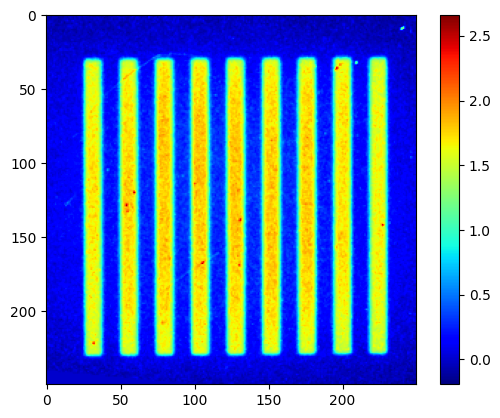

In [12]:
dose = od_1[1800:2100,1000:1300]
dose = ndimage.rotate(dose, -5.3)
dose = dose[60:310,30:280]

plt.imshow(dose, cmap= 'jet')
plt.colorbar()

dist_1 = np.average(dose[100:150,:], axis = 0)


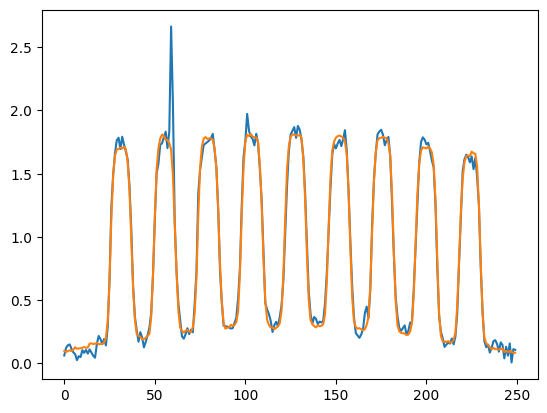

In [13]:
plt.plot(dose[120, :])
plt.plot(dist_1)
plt.show()

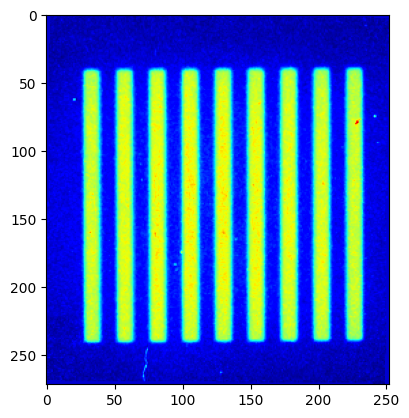

In [14]:
dose = od_2[1800:2070,980:1230]
dose = ndimage.rotate(dose, -0.5 )
# dose = dose[50:290,10:290]

plt.imshow(dose, cmap= 'jet')

dist_2 = np.average(dose[100:150,:], axis = 0)


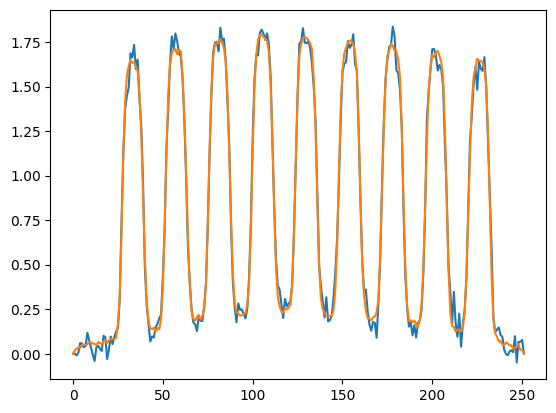

In [15]:
plt.plot(dose[120, :])
plt.plot(dist_2)

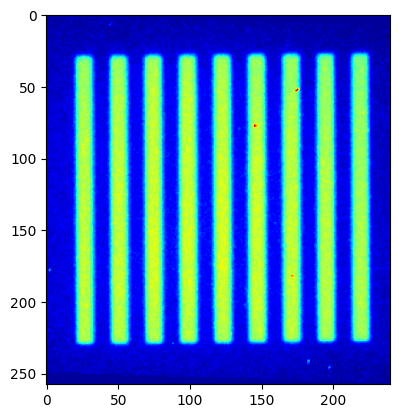

In [16]:
dose = od_3[1800:2050, 1070:1320]
dose = ndimage.rotate(dose, -1.8 )
dose = dose[:,10:250]

plt.imshow(dose, cmap= 'jet')

dist_3 = np.average(dose[100:150,:], axis = 0)

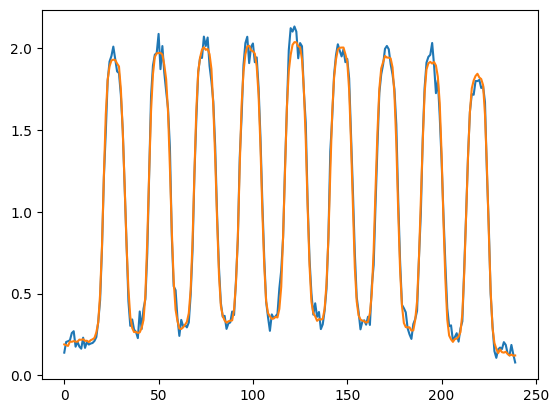

In [17]:
plt.plot(dose[130,:])
plt.plot(dist_3)

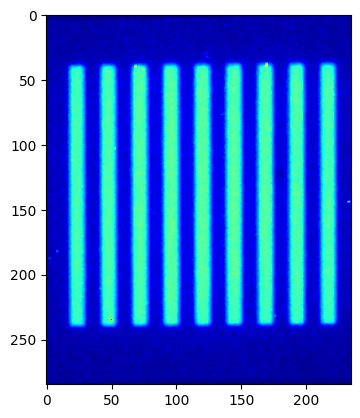

In [18]:
dose = od_4[1800:2080, 1070:1310]
dose = ndimage.rotate(dose, 1.1 )
dose = dose[:,5:240]

plt.imshow(dose, cmap= 'jet')

dist_4 = np.average(dose[100:150,:], axis = 0)

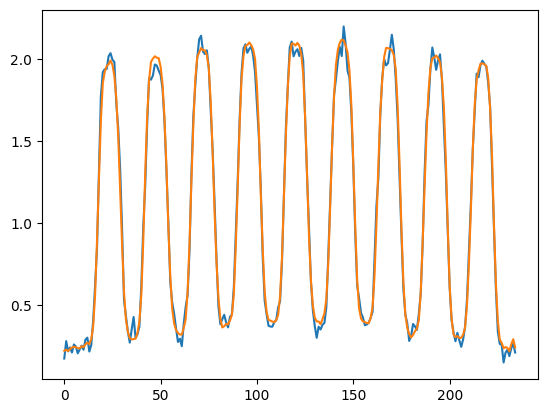

In [19]:
plt.plot(dose[100,:])
plt.plot(dist_4)

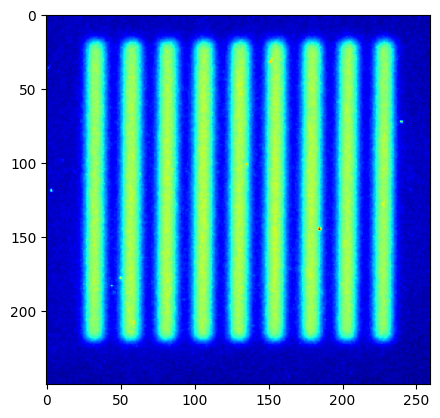

In [20]:
dose = od_5[1800:2050, 1030:1290]
# dose = ndimage.rotate(dose, 0 )
# dose = dose[:,10:270]

plt.imshow(dose, cmap= 'jet')

dist_5 = np.average(dose[100:150,:], axis = 0)

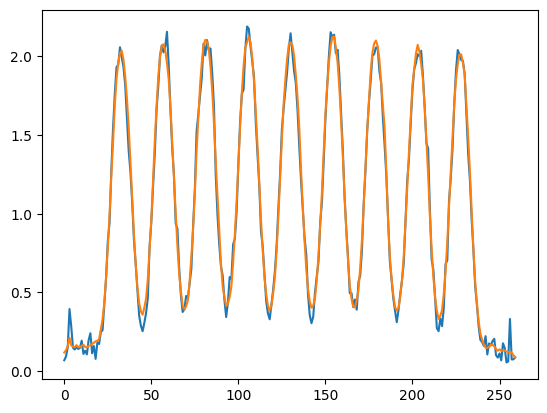

In [21]:
plt.plot(dose[120,:])
plt.plot(dist_5)

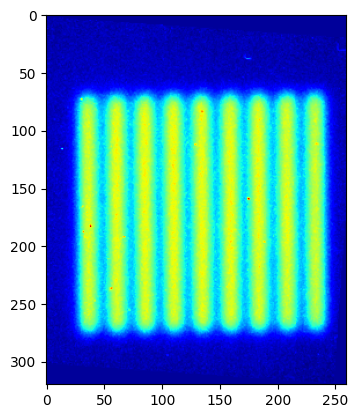

In [22]:
dose = od_6[1800:2100, 1000:1300]
dose = ndimage.rotate(dose, -4 )
dose = dose[:,50:310]

plt.imshow(dose, cmap= 'jet')

dist_6 = np.average(dose[150:200,:], axis = 0)

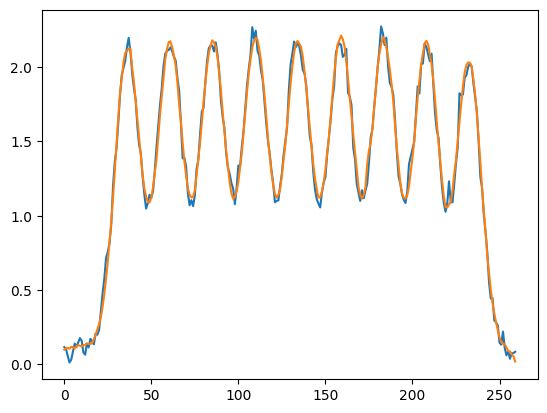

In [23]:
plt.plot(dose[150,:])
plt.plot(dist_6)

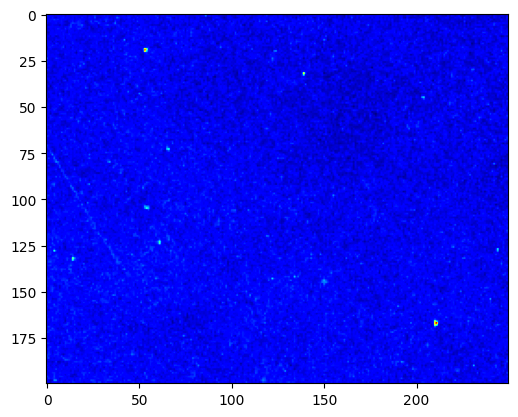

In [24]:
dose = od_7[1800:2000, 1100:1350]
dose = ndimage.rotate(dose, 0 )
# dose = dose[:,:270]

plt.imshow(dose, cmap= 'jet')

dist_7 = np.average(dose[75:125,:], axis = 0)

In [25]:
def multi_gauss_9(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5, A6, mu6, sigma6, A7, mu7, sigma7, A8, mu8, sigma8, A9, mu9, sigma9, off, off2):
   
    gauss1 = A1 * np.exp(-(x - mu1) ** 2 / (2 * sigma1 ** 2))
    gauss2 = A2 * np.exp(-(x - mu2) ** 2 / (2 * sigma2 ** 2))
    gauss3 = A3 * np.exp(-(x - mu3) ** 2 / (2 * sigma3 ** 2))
    gauss4 = A4 * np.exp(-(x - mu4) ** 2 / (2 * sigma4 ** 2))
    gauss5 = A5 * np.exp(-(x - mu5) ** 2 / (2 * sigma5 ** 2))
    gauss6 = A6 * np.exp(-(x - mu6) ** 2 / (2 * sigma6 ** 2))
    gauss7 = A7 * np.exp(-(x - mu7) ** 2 / (2 * sigma7 ** 2))
    gauss8 = A8 * np.exp(-(x - mu8) ** 2 / (2 * sigma8 ** 2))
    gauss9 = A9 * np.exp(-(x - mu9) ** 2 / (2 * sigma9 ** 2))

    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5 + gauss6 + gauss7 + gauss8 + gauss9 + off  + off2*x**2

In [26]:
def multi_gauss_9_higher(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3, A4, mu4, sigma4, A5, mu5, sigma5, A6, mu6, sigma6, A7, mu7, sigma7, A8, mu8, sigma8, A9, mu9, sigma9, off, off2, order):


    gauss1 = A1 * np.exp(-((x - mu1) ** 2 / (2 * sigma1 ** 2))**order)
    gauss2 = A2 * np.exp(-((x - mu2) ** 2 / (2 * sigma2 ** 2))**order)
    gauss3 = A3 * np.exp(-((x - mu3) ** 2 / (2 * sigma3 ** 2))**order)
    gauss4 = A4 * np.exp(-((x - mu4) ** 2 / (2 * sigma4 ** 2))**order)
    gauss5 = A5 * np.exp(-((x - mu5) ** 2 / (2 * sigma5 ** 2))**order)
    gauss6 = A6 * np.exp(-((x - mu6) ** 2 / (2 * sigma6 ** 2))**order)
    gauss7 = A7 * np.exp(-((x - mu7) ** 2 / (2 * sigma7 ** 2))**order)
    gauss8 = A8 * np.exp(-((x - mu8) ** 2 / (2 * sigma8 ** 2))**order)
    gauss9 = A9 * np.exp(-((x - mu9) ** 2 / (2 * sigma9 ** 2))**order)

    return gauss1 + gauss2 + gauss3 + gauss4 + gauss5 + gauss6 + gauss7 + gauss8 + gauss9 + off + off2*x**2


In [56]:
y_sim = [0.006759476, 0.006778418, 0.0067677773, 0.0069701793, 0.007068142, 0.0070226057, 0.0071452227, 0.007264838, 0.007296827, 0.0076033524, 0.008330194, 0.012963163, 0.02425085, 0.038187493, 0.045177277, 0.04699513, 0.04738173, 0.047587235, 0.04772074, 0.04742016, 0.04590654, 0.039835207, 0.029405538, 0.018377848, 0.011024584, 0.008933855, 0.008738839, 0.009092875, 0.009143726, 0.009108674, 0.009582076, 0.012600011, 0.02195636, 0.03602698, 0.045360304, 0.048138157, 0.04960732, 0.049571395, 0.049304865, 0.049490564, 0.04888496, 0.045180045, 0.035955656, 0.024307312, 0.01499274, 0.011387488, 0.011209707, 0.011154245, 0.011181711, 0.011574867, 0.011459824, 0.0133267045, 0.020611279, 0.03442066, 0.045688167, 0.04995482, 0.051177915, 0.051330272, 0.051642295, 0.051610928, 0.050872058, 0.048411362, 0.04098761, 0.029392013, 0.017991988, 0.012468548, 0.011309193, 0.011094517, 0.011243598, 0.011395292, 0.011502582, 0.012372792, 0.017309457, 0.029391425, 0.042155065, 0.048935093, 0.051018953, 0.05126251, 0.051290084, 0.051205344, 0.05106636, 0.049763046, 0.04445116, 0.033924192, 0.021258866, 0.013613744, 0.011728368, 0.011494808, 0.011601237, 0.011554674, 0.011627707, 0.012065244, 0.015368909, 0.025365513, 0.038621936, 0.0470826, 0.050800264, 0.051118694, 0.05160786, 0.051507298, 0.051401377, 0.050641406, 0.046729486, 0.03863384, 0.025268817, 0.015154588, 0.01187459, 0.011696132, 0.011731212, 0.011585172, 0.011677503, 0.011910765, 0.013821809, 0.021299766, 0.034161646, 0.04470824, 0.049509022, 0.0512065, 0.05131767, 0.05127431, 0.05127809, 0.050857358, 0.048999917, 0.04192907, 0.029249346, 0.017328368, 0.012413561, 0.011583732, 0.011438971, 0.011480226, 0.011361257, 0.011309948, 0.0122935, 0.017893525, 0.02937753, 0.040849466, 0.04801759, 0.050842956, 0.051217526, 0.051398046, 0.051615138, 0.05152819, 0.049991455, 0.045582205, 0.034154434, 0.020877628, 0.013361746, 0.0116183385, 0.011402413, 0.011331656, 0.011174044, 0.01107991, 0.011457315, 0.015039159, 0.02443283, 0.035847265, 0.045171857, 0.049133375, 0.04979564, 0.049776834, 0.049574368, 0.04924842, 0.0486246, 0.045168903, 0.03593609, 0.022123646, 0.0124974605, 0.009468677, 0.009021702, 0.008994183, 0.008781881, 0.008902486, 0.008898067, 0.011002621, 0.018457387, 0.029461421, 0.0399007, 0.04540599, 0.047163434, 0.047598224, 0.04762235, 0.0473835, 0.04706576, 0.04501946, 0.037992287, 0.024437873, 0.012883155, 0.008365432, 0.007594689, 0.0071936925, 0.007131923, 0.0071965684, 0.007181645, 0.0070773424, 0.006964752, 0.0068727126, 0.0069066193, 0.006800711]
x_sim = np.linspace(-9.9, 9.9, 2*99)


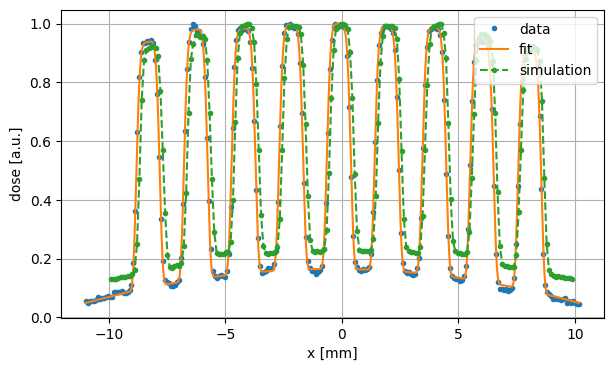

In [63]:
distribs = [dist_1, dist_2, dist_3, dist_4, dist_5, dist_6, dist_7]

params = []
pvdr_fit = []
for i in range(9):
    params.append(2)
    params.append(-8 + 2*i)
    params.append(0.5)
params.append(0)
params.append(0)
params.append(1.5)

peak = []
valley = []

for i in range(4):
    data_tr = np.array(distribs[i]) #- zeros[i]

    x_min = - 0.0847*len(distribs[i])/2
    x_max = 0.0847*len(distribs[i])/2 

    x_fit = np.linspace(x_min, x_max, len(distribs[i]))
    x_cont = np.linspace(x_min, x_max, 10000)

    popt, pcov = curve_fit(multi_gauss_9_higher, x_fit, data_tr, p0 = params, maxfev  = 300000)

    y_plot = multi_gauss_9_higher(x_cont, *popt)
    pvdr_fit.append(np.max(y_plot[3800:5500])/np.min(y_plot[3800:5500]))
    peak.append(np.max(y_plot[3800:5500]))
    valley.append(np.min(y_plot[3800:5500]))

    
    if i== 0:
       
        plt.figure(figsize = (7,4))
        plt.plot(x_fit-0.4,data_tr/np.max(data_tr), '.', label = 'data')
        plt.plot(x_cont-0.4,y_plot/np.max(y_plot), label = 'fit')

params = []

for i in range(9):
    params.append(2)
    params.append(-8 + 2*i)
    params.append(0.5)

params.append(1)
params.append(0)

for i in range(4,6):
    data_tr = np.array(distribs[i]) #- zeros[i]

    x_min = - 0.0847*len(distribs[i])/2
    x_max = 0.0847*len(distribs[i])/2 

    x_fit = np.linspace(x_min, x_max, len(distribs[i]))
    x_cont = np.linspace(x_min, x_max, 10000)

    popt, pcov = curve_fit(multi_gauss_9, x_fit, data_tr, p0 = params, maxfev  = 200000)

    y_plot = multi_gauss_9(x_cont, *popt)
    pvdr_fit.append(np.max(y_plot[3800:5500])/np.min(y_plot[3800:5500]))
    peak.append(np.max(y_plot[3800:5500]))
    valley.append(np.min(y_plot[3800:5500]))

    if i == 6:
    
        plt.plot(x_fit,data_tr/np.max(data_tr), '.', label = 'data')
        plt.plot(x_cont,y_plot/np.max(y_plot), label = 'fit')


plt.grid()
# plt.plot(x_len-0.5, dose_sim/np.max(dose_sim),'.' ,label = 'simulated')
plt.plot(x_sim, y_sim/np.max(y_sim),'.--' ,label = 'simulation')
plt.legend(loc = 'upper right')
plt.xlabel('x [mm]')
plt.ylabel('dose [a.u.]')
plt.savefig('data_pacchetto_sim.png')
plt.show()

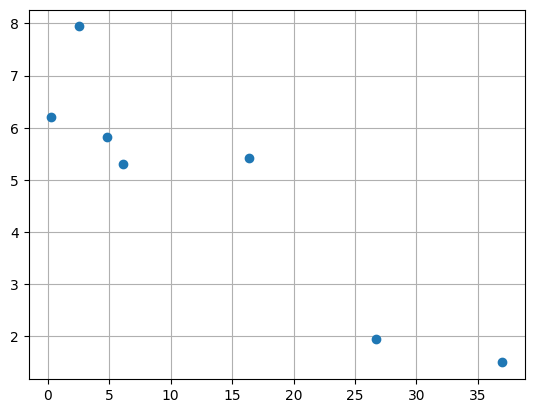

In [28]:
x_pvdr = np.array([0.28 ,2.56, 4.84, 6.12, 16.4, 26.68, 36.96])
pvdr_fit.append(1.5)
plt.plot(x_pvdr[:], pvdr_fit[:], 'o')
plt.grid()

In [31]:
print(pvdr_fit)

[6.198616193140037, 7.94206192366742, 5.824586186312795, 5.313471464926459, 5.414347566815265, 1.9419267240354916, 1.5]


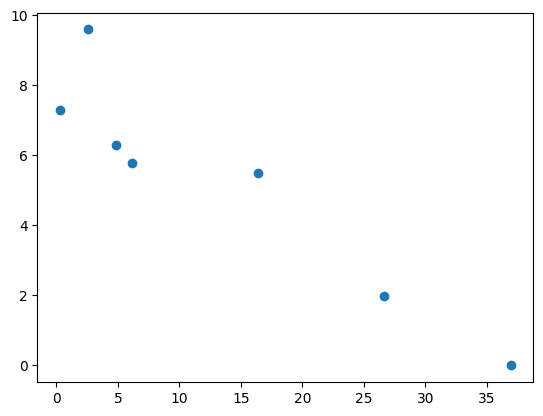

In [ ]:
pvdr = np.zeros([7])
for i in range(6):
    dat = distribs[i]
    pvdr[i] = np.max(dat[70:170])/np.min(dat[70:170])

plt.plot(x_pvdr,pvdr, 'o')

In [ ]:
x_len = np.linspace(-10,10,200)
dose_sim = [0.002386, 0.002388, 0.00238, 0.002466, 0.002432, 0.002462, 0.002527, 0.00285, 0.003567, 0.005424, 0.00845, 0.0129, 0.01817, 0.02327, 0.0269, 0.02936, 0.03036, 0.03067, 0.0299, 0.02786, 0.02498, 0.02098, 0.01619, 0.01174, 0.0081, 0.005226, 0.00382, 0.003328, 0.003405, 0.004543, 0.006958, 0.01034, 0.01547, 0.02048, 0.02509, 0.02815, 0.0303, 0.0313, 0.03107, 0.02971, 0.02791, 0.02446, 0.02019, 0.015434, 0.010925, 0.00728, 0.00491, 0.003836, 0.003529, 0.003998, 0.005436, 0.00805, 0.01227, 0.01736, 0.02255, 0.02669, 0.02975, 0.03102, 0.0316, 0.03093, 0.02968, 0.02733, 0.02385, 0.01918, 0.01455, 0.009995, 0.006702, 0.004852, 0.004074, 0.004066, 0.004868, 0.00661, 0.009834, 0.01445, 0.01944, 0.02438, 0.02809, 0.03024, 0.0317, 0.0318, 0.03122, 0.02942, 0.02654, 0.02269, 0.01779, 0.01291, 0.00876, 0.005875, 0.0044, 0.00398, 0.00421, 0.00529, 0.007465, 0.01117, 0.01607, 0.02121, 0.02553, 0.02867, 0.03043, 0.03162, 0.03156, 0.03056, 0.02855, 0.02559, 0.02095, 0.01588, 0.01108, 0.00758, 0.00528, 0.00417, 0.003902, 0.004505, 0.005966, 0.00878, 0.01299, 0.01814, 0.02269, 0.02689, 0.02933, 0.03084, 0.03177, 0.0317, 0.03032, 0.028, 0.02461, 0.01967, 0.01423, 0.00978, 0.00677, 0.004715, 0.00403, 0.004078, 0.004852, 0.006725, 0.01004, 0.01447, 0.01906, 0.0236, 0.02734, 0.02977, 0.03113, 0.0316, 0.03094, 0.02963, 0.02675, 0.02275, 0.01738, 0.01219, 0.00812, 0.00546, 0.004055, 0.003574, 0.003693, 0.0049, 0.00728, 0.011086, 0.01539, 0.02013, 0.02448, 0.02783, 0.02966, 0.03073, 0.03105, 0.02998, 0.02849, 0.02489, 0.0204, 0.01503, 0.01053, 0.006783, 0.004635, 0.003487, 0.00334, 0.003906, 0.005352, 0.008064, 0.01193, 0.01643, 0.02092, 0.02524, 0.0281, 0.03, 0.03087, 0.03049, 0.02946, 0.02708, 0.02335, 0.01817, 0.01303, 0.00861, 0.00556, 0.003727, 0.002863, 0.00262, 0.002394, 0.002375, 0.002369, 0.002377, 0.00234, 0.002338]
